In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector=inspect(engine)
m=inspector.get_columns('measurement')
s= inspector.get_columns('station')
for col in m:
    print(col['name'],col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
for coll in s:
    print(coll['name'],coll['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

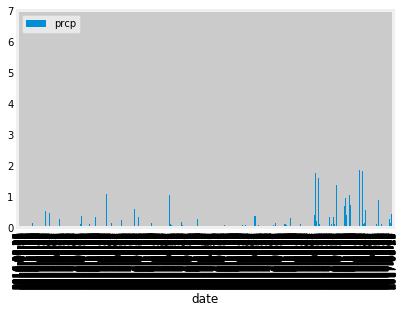

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#for some reason this doesn't work output= session.query(Measurement.station,func.sum(Measurement.prcp) ).group_by((dt.datetime.strptime(Measurement.date, '%Y-%m-%d')).month)
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
m_df=pd.read_sql("select date,prcp from Measurement where Measurement.date>='2016-08-23'",conn)
m_df.set_index('date',inplace = True)
# Sort the dataframe by date
m_df.tail()
m_df.plot(kind='bar')
plt.show()

In [13]:

# Calculate the date 1 year ago from the last data point in the database
o=session.query(func.max(Measurement.date))
for i in o:
    print(dt.datetime.strptime(str(i[0]),"%Y-%m-%d"))

d=dt.datetime.strptime(str(i[0]),"%Y-%m-%d")- dt.timedelta(days=365)
print((d))


2017-08-23 00:00:00
2016-08-23 00:00:00


In [14]:


# Use Pandas Plotting with Matplotlib to plot the data

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data

m_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
# Design a query to show how many stations are available in this dataset?
s=0
output2=session.query((Measurement.station)).group_by(Measurement.station)
for j in output2:
    print(j)
    s=s+1
print(s)

('USC00511918',)
('USC00513117',)
('USC00514830',)
('USC00516128',)
('USC00517948',)
('USC00518838',)
('USC00519281',)
('USC00519397',)
('USC00519523',)
9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
output2=session.query(Measurement.station,func.count(Measurement.id)).group_by(Measurement.station).order_by((func.count(Measurement.id)).desc())
for j in output2:
    print(j)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
output3=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for k in output3:
    print(k)

(54.0, 85.0, 71.66378066378067)


In [19]:
# Choose the station with the highest number of temperature observations.
output4=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by((func.count(Measurement.tobs)).desc())
for j in output4:
    print(j)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=[]
temp2=[]
freq=[]
output5=session.query(Measurement.tobs,func.count(Measurement.tobs)).filter(Measurement.date>'2016-08-23',Measurement.station=='USC00519281').group_by((Measurement.tobs))
for k in output5:
    (t,f)=k
    temp.append(t)
    freq.append(f)

In [28]:
output6=session.query(Measurement.tobs).filter(Measurement.date>'2016-08-23',Measurement.station=='USC00519281')
for p in output6:
    temp2.append(p)

In [43]:
temp3=[]
for a in temp2:
    (p,)=a
    temp3.append(p)

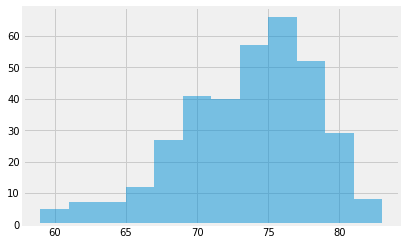

In [44]:
num_bins = 12
plt.hist(temp3, num_bins, alpha=0.5)
plt.show()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-02-28', '2017-03-05'))

suppose my trip dates are 28th Feb 2018 to 5th March 2018

In [ ]:

# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2017-02-28', '2017-03-05'))
calc_temps('2017-02-28', '2017-03-05')[0][2]

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
a=calc_temps('2017-02-28', '2017-03-05')
plt.bar(a[0][1],a[0][1],yerr=a[0][2]-a[0][0])
plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
output6=session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,
                      func.sum(Measurement.prcp)).filter(Station.station==Measurement.station).filter(Measurement.date >= '2017-02-28',Measurement.date <= '2017-03-05').group_by(Measurement.station).order_by((func.sum(Measurement.prcp)).desc())
for j in output6:
    print(j)

In [ ]:
from flask import Flask,jsonify

app = Flask(__name__)
@app.route("/")
def home():
    return ("You are amazing - and you can select any route from the below /n precipitation /n stations /n temperature /n start and end date ")

@app.route("/api/v1.0/precipitation")
def prec():
    dates=[]
    precp=[]
    outputs=session.query(Measurement.date,Measurement.prcp)
    for row in outputs:
        (a,b)=row
        dates.append(a)
        precp.append(b)
    dateprec=dict(zip(dates,precp))
    return jsonify(dateprec)

@app.route("/api/v1.0/stations")
def stn():
    sttn=[]
    outputa=session.query(Measurement.station).group_by(Measurement.station)
    for row in outputa:
        sttn.append(row)
    return jsonify(sttn)

@app.route("/api/v1.0/tobs")
def temps():
    temp1=[]
    outputb=session.query(Measurement.tobs).filter(Measurement.date>='2016-08-23')
    for row in outputb:
        temp1.append(row)
    return jsonify(temp1)

@app.route("/api/v1.0/<start>")
def strt(start):
    return jsonify(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).all())
            
@app.route("/api/v1.0/<start>/<end>")
def strtend(start,end):
    return jsonify(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).all())         
            
if __name__ == "__main__":
    app.run(debug=False)

In [ ]:
sttn=[]
outputs=session.query(Measurement.station).group_by(Measurement.station)
for row in outputs
    (sttn.append(row))
print(sttn)

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
